In [128]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [129]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.5.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.2
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0


In [130]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [131]:
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt


In [132]:
ds=tfds.load('fashion_mnist',split='train')

In [133]:
dataiterator=ds.as_numpy_iterator()

In [134]:
import numpy as np

In [135]:
dataiterator.next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

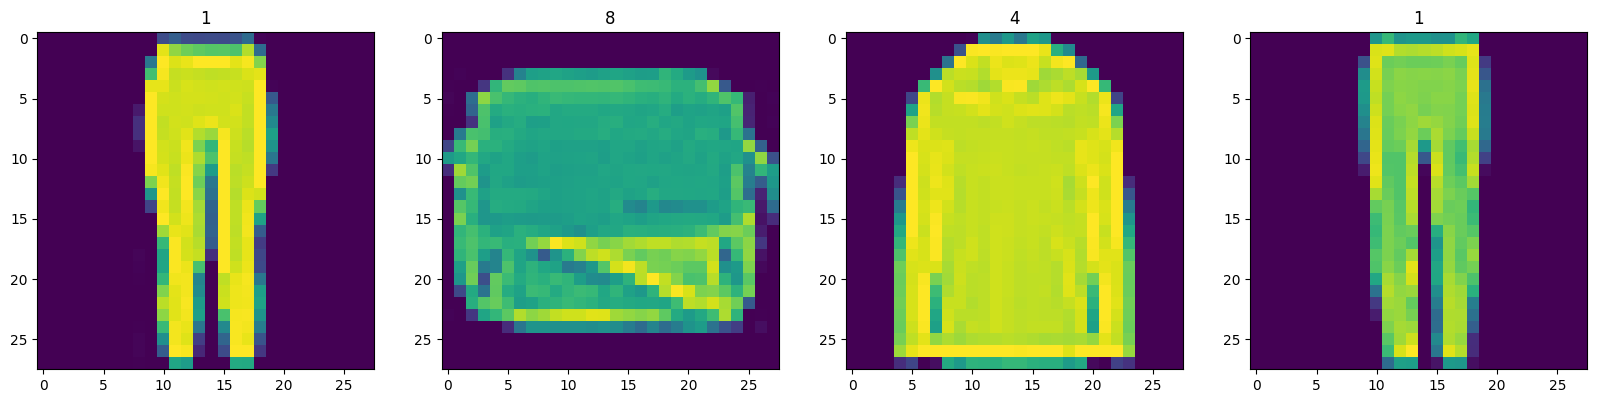

In [136]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = dataiterator.next()
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

In [137]:
def scale_images(data):
  image=data['image']
  return image/255


In [138]:
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

In [139]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [140]:
def build_generator():
  model=Sequential()
  model.add(Dense((7*7*128),input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  model.add(UpSampling2D())
  #1
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.4))
  #2
  model.add(UpSampling2D())
  model.add(Conv2D(128,5, padding='same'))
  model.add(LeakyReLU(0.4))
  #1D
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))
  #2D
  model.add(Conv2D(128,4,padding='same'))
  model.add(LeakyReLU(0.2))
  #final
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'))



  return model



In [141]:


test_model=build_generator()

In [142]:
test_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_6 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_58 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [143]:
img = test_model.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 249ms/step


In [144]:
img=img[0]
img.shape

(28, 28, 1)

1/1 [==============================] - 0s 138ms/step


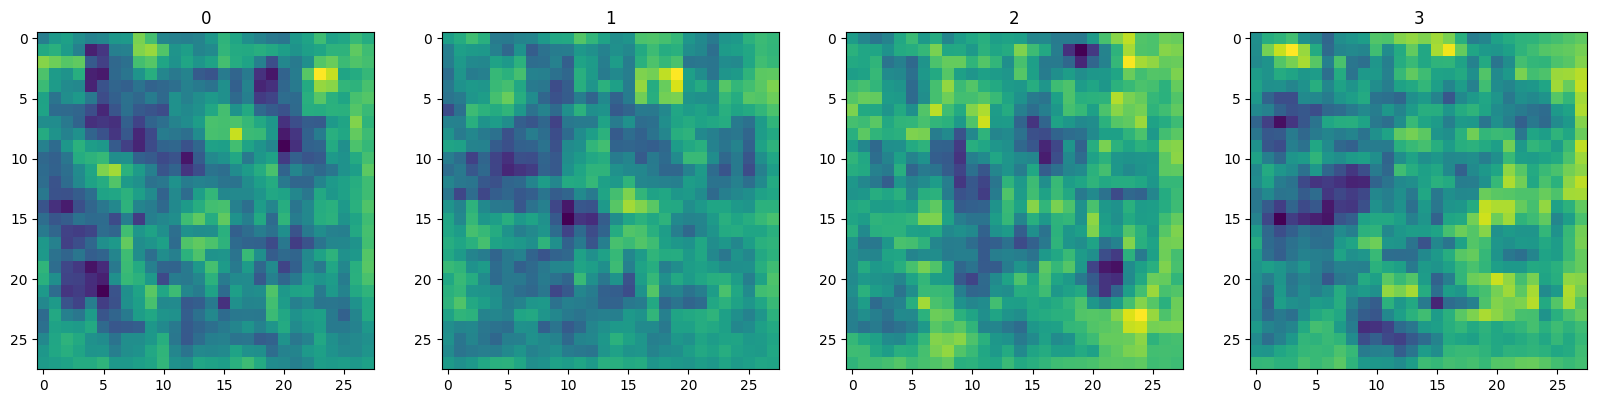

In [145]:
img = test_model.predict(np.random.randn(4,128,1))
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, img in enumerate(img):
    # Plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title
    ax[idx].title.set_text(idx)


In [188]:
def build_discriminator():
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3,3) , input_shape = (28,28,1),padding='same',data_format = 'channels_last'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Second Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Third Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Fourth Conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    return model






In [189]:



discriminator=build_discriminator()

In [190]:
discriminator.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_76 (LeakyReLU)  (None, 28, 28, 32)        0         
                                                                 
 dropout_70 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 conv2d_80 (Conv2D)          (None, 24, 24, 64)        51264     
                                                                 
 leaky_re_lu_77 (LeakyReLU)  (None, 24, 24, 64)        0         
                                                                 
 dropout_71 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_81 (Conv2D)          (None, 20, 20, 128)     

In [191]:
img1 = test_model.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 151ms/step


In [192]:


img1=img1[0]

In [193]:
img1.shape

(28, 28, 1)

In [194]:
discriminator.predict(img1)

ValueError: ignored

In [195]:
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [196]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [197]:
from tensorflow.keras.models import Model